# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

WHO (Audience)
Healthcare professionals as well as hospital administrators who are looking deeply for better understanding of diagnosis patterns, treatment stages, and demographic factors 
and interested in improving colorectal cancer outcomes. 


WHAT (Message)
To show how multiple factors like  patient age, stage at diagnosis.. etc affect the survival outcomes and treatment decisions.
The ultimate goal is to highlight areas for earlier screening and equitable treatment.


HOW (Visualization Approach)
How to mainatin clarity to visual clean, highlight data points (e.g., highest mortality stage).

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
url = "https://raw.githubusercontent.com/muathdb/OMDS-Week2-Abusamreh-Muath-/refs/heads/main/colorectal_cancer_dataset.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [5]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [6]:
duplicates_exist = df.duplicated().any()
print("Any duplicate rows?", duplicates_exist)

Any duplicate rows? False


In [7]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [8]:
df['Patient_ID'].duplicated().any()

np.False_

In [9]:
df['Patient_ID'].duplicated().sum()

np.int64(0)

In [11]:
df.mean(numeric_only=True)

Patient_ID                 83749.000000
Age                           69.200780
Tumor_Size_mm                 42.005708
Healthcare_Costs           72452.168099
Incidence_Rate_per_100K       34.531562
Mortality_Rate_per_100K       17.023875
dtype: float64

In [12]:
df.median(numeric_only=True)

Patient_ID                 83749.0
Age                           69.0
Tumor_Size_mm                 42.0
Healthcare_Costs           72344.0
Incidence_Rate_per_100K       35.0
Mortality_Rate_per_100K       17.0
dtype: float64

In [13]:
df.mode().iloc[0]

Patient_ID                             1
Country                              USA
Age                                 74.0
Gender                                 M
Cancer_Stage                    Regional
Tumor_Size_mm                       22.0
Family_History                        No
Smoking_History                       No
Alcohol_Consumption                  Yes
Obesity_BMI                   Overweight
Diet_Risk                       Moderate
Physical_Activity               Moderate
Diabetes                              No
Inflammatory_Bowel_Disease            No
Genetic_Mutation                      No
Screening_History                Regular
Early_Detection                      Yes
Treatment_Type                   Surgery
Survival_5_years                     Yes
Mortality                             No
Healthcare_Costs                 53546.0
Incidence_Rate_per_100K             25.0
Mortality_Rate_per_100K             21.0
Urban_or_Rural                     Urban
Economic_Classif

In [14]:
df.isnull().values.any()

np.False_

In [15]:
df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [16]:
df[(df['Age'] < 0) | (df['Age'] > 120)]

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction


In [17]:
df[df['Tumor_Size_mm'] <= 0]

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction


In [19]:
df[~df['Gender'].isin(['Male', 'Female'])]

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167492,167493,USA,69,M,Localized,49,No,Yes,No,Overweight,...,No,Yes,100924,57,13,Rural,Developed,Moderate,Insured,Yes
167493,167494,USA,79,F,Regional,29,Yes,Yes,Yes,Overweight,...,Yes,Yes,90331,39,22,Urban,Developed,Low,Insured,Yes
167494,167495,USA,74,M,Metastatic,62,Yes,Yes,Yes,Normal,...,Yes,Yes,90631,13,19,Urban,Developing,Low,Insured,Yes
167495,167496,UK,68,F,Localized,35,No,Yes,Yes,Normal,...,Yes,No,114385,18,23,Urban,Developed,Moderate,Insured,Yes


In [20]:
df[(df['Survival_5_years'] == 1) & (df['Mortality'] == 1)]

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction


In [22]:
df['Obesity_BMI'] = pd.to_numeric(df['Obesity_BMI'], errors='coerce')

In [23]:
df[(df['Obesity_BMI'] < 10) | (df['Obesity_BMI'] > 80)]

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction


In [24]:
categorical_cols = [
    'Country', 'Gender', 'Cancer_Stage', 'Family_History',
    'Smoking_History', 'Alcohol_Consumption', 'Diet_Risk',
    'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
    'Genetic_Mutation', 'Screening_History', 'Early_Detection',
    'Treatment_Type', 'Urban_or_Rural', 'Economic_Classification',
    'Healthcare_Access', 'Insurance_Status'
]

In [25]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
print(df_encoded.shape)
df_encoded.head()

(167497, 67)


,Patient_ID,Age,Tumor_Size_mm,Obesity_BMI,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Survival_Prediction,...,Treatment_Type_Surgery,Urban_or_Rural_Rural,Urban_or_Rural_Urban,Economic_Classification_Developed,Economic_Classification_Developing,Healthcare_Access_High,Healthcare_Access_Low,Healthcare_Access_Moderate,Insurance_Status_Insured,Insurance_Status_Uninsured
0,1,77,69,NaN,Yes,No,54413,50,5,Yes,...,False,False,True,True,False,False,False,True,True,False
1,2,59,33,NaN,Yes,No,76553,37,25,Yes,...,False,False,True,False,True,True,False,False,False,True
2,3,66,17,NaN,Yes,No,62805,54,27,No,...,False,False,True,True,False,False,False,True,False,True
3,4,83,14,NaN,Yes,No,89393,45,11,Yes,...,True,False,True,True,False,False,False,True,True,False
4,5,66,34,NaN,Yes,No,66425,15,27,Yes,...,True,False,True,False,True,True,False,False,True,False


Yes the data is usable because it is well-suited for analysis and machine learning, especially that it includes: Predicting 5-year survival, risk factors relation as well as Cost and outcome comparison across demographics

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

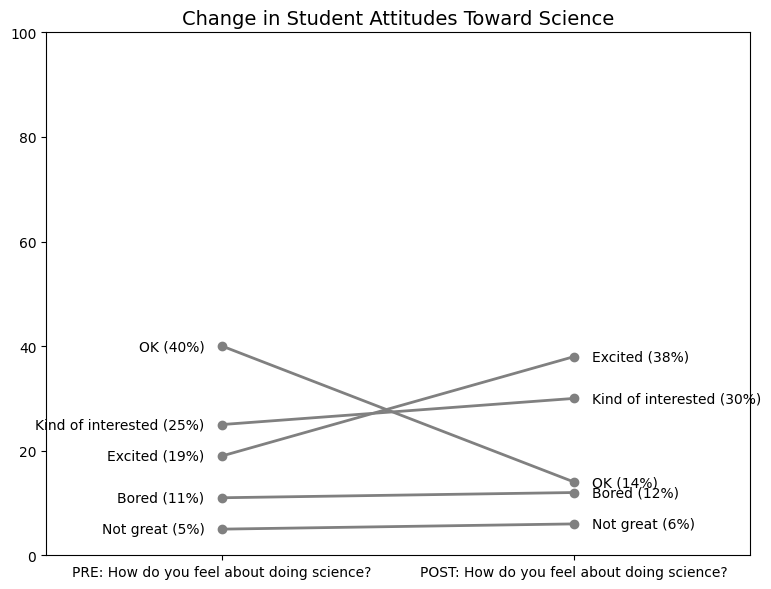

In [26]:
import matplotlib.pyplot as plt

labels = ['Bored', 'Not great', 'OK', 'Kind of interested', 'Excited']

pre = [11, 5, 40, 25, 19]
post = [12, 6, 14, 30, 38]

plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot([0, 1], [pre[i], post[i]], marker='o', linewidth=2, color='gray')
    plt.text(-0.05, pre[i], f'{labels[i]} ({pre[i]}%)', ha='right', va='center')
    plt.text(1.05, post[i], f'{labels[i]} ({post[i]}%)', ha='left', va='center')

plt.xticks([0, 1], ['PRE: How do you feel about doing science?', 'POST: How do you feel about doing science?'], fontsize=10)
plt.title('Change in Student Attitudes Toward Science', fontsize=14)
plt.xlim(-0.5, 1.5)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
